In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
data_set = pd.read_csv('Salary_DSR.csv')
x = data_set.iloc[ : , 1:-1].values
y = data_set.iloc[ : , -1 ].values

In [9]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [12]
 [13]]


In [7]:
print(y)

[  17000   27000   40000   65000  100000  150000  250000  400000  650000
 1000000 1800000 4000000]


### Feature Scaling

In [11]:
y = y.reshape(len(y),1)

In [12]:
print(y)

[[  17000]
 [  27000]
 [  40000]
 [  65000]
 [ 100000]
 [ 150000]
 [ 250000]
 [ 400000]
 [ 650000]
 [1000000]
 [1800000]
 [4000000]]


### Training the SVR model on the dataset

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [18]:
print(x)
# They are confined in between the values of -2 to 2 

[[-1.52973232]
 [-1.25977956]
 [-0.9898268 ]
 [-0.71987403]
 [-0.44992127]
 [-0.17996851]
 [ 0.08998425]
 [ 0.35993702]
 [ 0.62988978]
 [ 0.89984254]
 [ 1.43974807]
 [ 1.70970083]]


In [19]:
print(y)

[[-0.62024154]
 [-0.61126879]
 [-0.59960421]
 [-0.57717233]
 [-0.54576769]
 [-0.50090393]
 [-0.4111764 ]
 [-0.27658511]
 [-0.05226629]
 [ 0.26178007]
 [ 0.9796003 ]
 [ 2.95360593]]


In [22]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')  # RBF -> a type of method in SVM kernel
regressor.fit(x,y)

D:\Python_3_11\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### Predicting a new result 

In [31]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1, 1))

array([[298252.57347613]])

### Visualising the SVR results

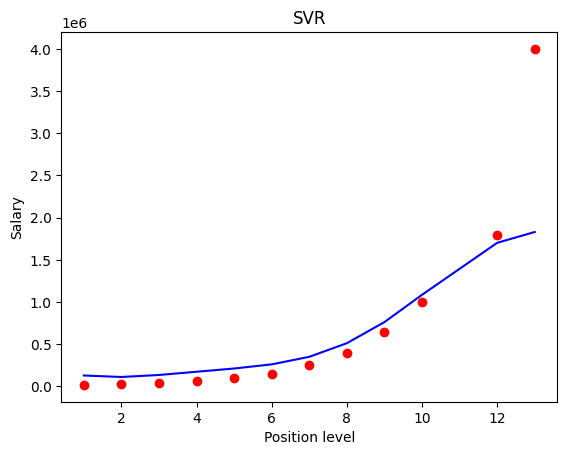

In [36]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1, 1)),color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()